In [11]:
import pandas as pd
import numpy as np

# 1. Load the dataset
# Assuming the file is named 'Netflix Dataset.csv'
df = pd.read_csv("C:\\Users\\Abdul Malik\\Downloads\\Telegram Desktop\\Netflix Dataset.csv")

print("--- 1. Initial Data Overview ---")
print(f"Total Rows: {len(df)}")
# print(df.head()) # Commented out for cleaner output
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# 2. Data Cleaning and Feature Engineering

# --- A. Handle 'Release_Date' (FIXED) ---
# Use format='mixed' to handle inconsistent date formats across the column
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed')

# Drop rows where Release_Date is NaT (Not a Time) after conversion, which usually means the date was missing in the original data
df.dropna(subset=['Release_Date'], inplace=True)

# Extract the Release Year
df['Release_Year'] = df['Release_Date'].dt.year.astype(int)

# --- B. Handle Categorical Columns (Country, Director) ---
# Fill remaining missing values in non-critical categorical columns with 'Unknown'
df['Director'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True) # Good practice to fill all used categorical nulls

# --- C. De-normalize Compound Data (Explode for Type/Genre and Country) ---
# This is necessary for accurate counting of individual genres and countries.

# De-normalize 'Type' (Genre) for Objective 2
# Create a new DataFrame for genre analysis (using the cleaned main df)
df_genre = df.assign(Type=df['Type'].str.split(', ')).explode('Type')
df_genre['Type'] = df_genre['Type'].str.strip()
df_genre.dropna(subset=['Type'], inplace=True) # Drop rows if the Type itself was empty

# De-normalize 'Country' for Objective 3
# Create a new DataFrame for country analysis
df_country = df.assign(Country=df['Country'].str.split(', ')).explode('Country')
df_country['Country'] = df_country['Country'].str.strip()
# Exclude the 'Unknown' country values from the analysis DataFrame
df_country = df_country[df_country['Country'] != 'Unknown']
df_country.dropna(subset=['Country'], inplace=True)


print("\n--- 2. Data Preparation Summary (SUCCESS) ---")
print(f"Total Rows After Cleaning Missing Dates: {len(df)}")
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nSample Data with 'Release_Year':")
print(df[['Title', 'Release_Date', 'Release_Year', 'Category', 'Type']].head(3))
print("\nSample of Exploded Genre Data:")
print(df_genre[['Title', 'Type']].head(5))
print("\nSample of Exploded Country Data:")
print(df_country[['Title', 'Country']].head(5))

--- 1. Initial Data Overview ---
Total Rows: 7789

Missing Values Before Cleaning:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

--- 2. Data Preparation Summary (SUCCESS) ---
Total Rows After Cleaning Missing Dates: 7779

Missing Values After Cleaning:
Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Release_Year    0
dtype: int64

Sample Data with 'Release_Year':
   Title Release_Date  Release_Year Category  \
0     3%   2020-08-14          2020  TV Show   
1  07:19   2016-12-23          2016    Movie   
2  23:59   2018-12-20          2018    Movie   

                                                Type  
0  International TV Shows, TV Dramas,

C:\Users\Abdul Malik\AppData\Local\Temp\ipykernel_26280\361567184.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\Abdul Malik\AppData\Local\Temp\ipykernel_26280\361567184.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy


--- Objective 1: Movies vs. TV Shows Trend ---


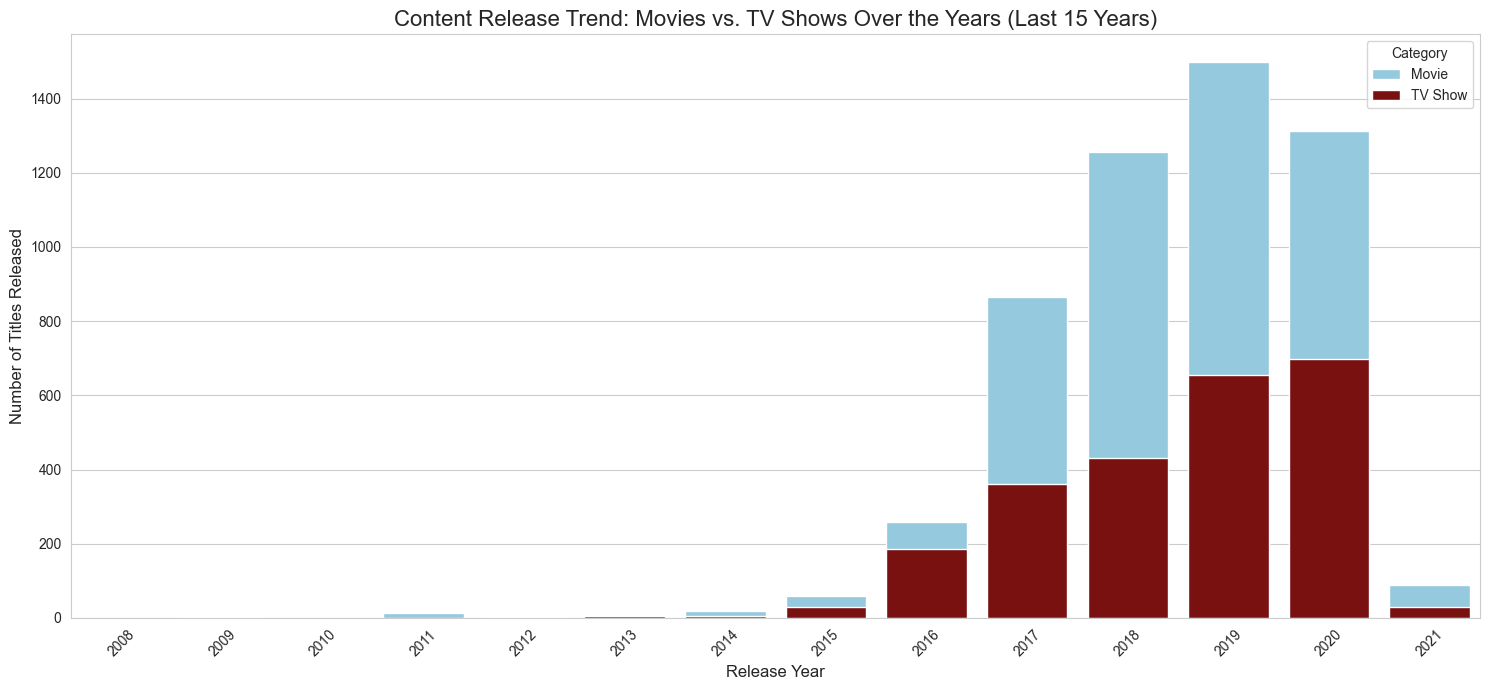

Content released in 2021:
    Release_Year Category  Count
22          2021    Movie     88
23          2021  TV Show     29


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set a consistent style and figure size for professional plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Assuming the cleaned DataFrames (df, df_genre, df_country) from Step 1 are available.

# -----------------------------------------------------------
# Objective 1: Analyze the Distribution of Movies vs. TV Shows Over the Years
# -----------------------------------------------------------
print("\n--- Objective 1: Movies vs. TV Shows Trend ---")

# 1. Group and Count releases by Year and Category
# We use the main cleaned DataFrame (df)
content_yearly = df.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')

# Filter for relevant years (e.g., last 15 years to see the trend clearly)
content_yearly = content_yearly[content_yearly['Release_Year'] >= content_yearly['Release_Year'].max() - 15]

# 2. Visualization (Stacked Bar Chart for clear comparison)
plt.figure(figsize=(15, 7))
sns.barplot(
    data=content_yearly,
    x='Release_Year',
    y='Count',
    hue='Category',
    palette={'Movie': 'skyblue', 'TV Show': 'darkred'},
    dodge=False # Use dodge=False for a stacked effect
)
plt.title('Content Release Trend: Movies vs. TV Shows Over the Years (Last 15 Years)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show() # Display the first plot

# 3. Key Finding 1 (Recent Trend):
latest_year = df['Release_Year'].max()
latest_counts = content_yearly[content_yearly['Release_Year'] == latest_year].sort_values(by='Count', ascending=False)
print(f"Content released in {latest_year}:\n{latest_counts}")


--- Objective 2: Genre Popularity Trend ---
Top 10 Overall Genres:
['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries', 'Action & Adventure', 'TV Dramas', 'Independent Movies', 'Children & Family Movies', 'Romantic Movies']


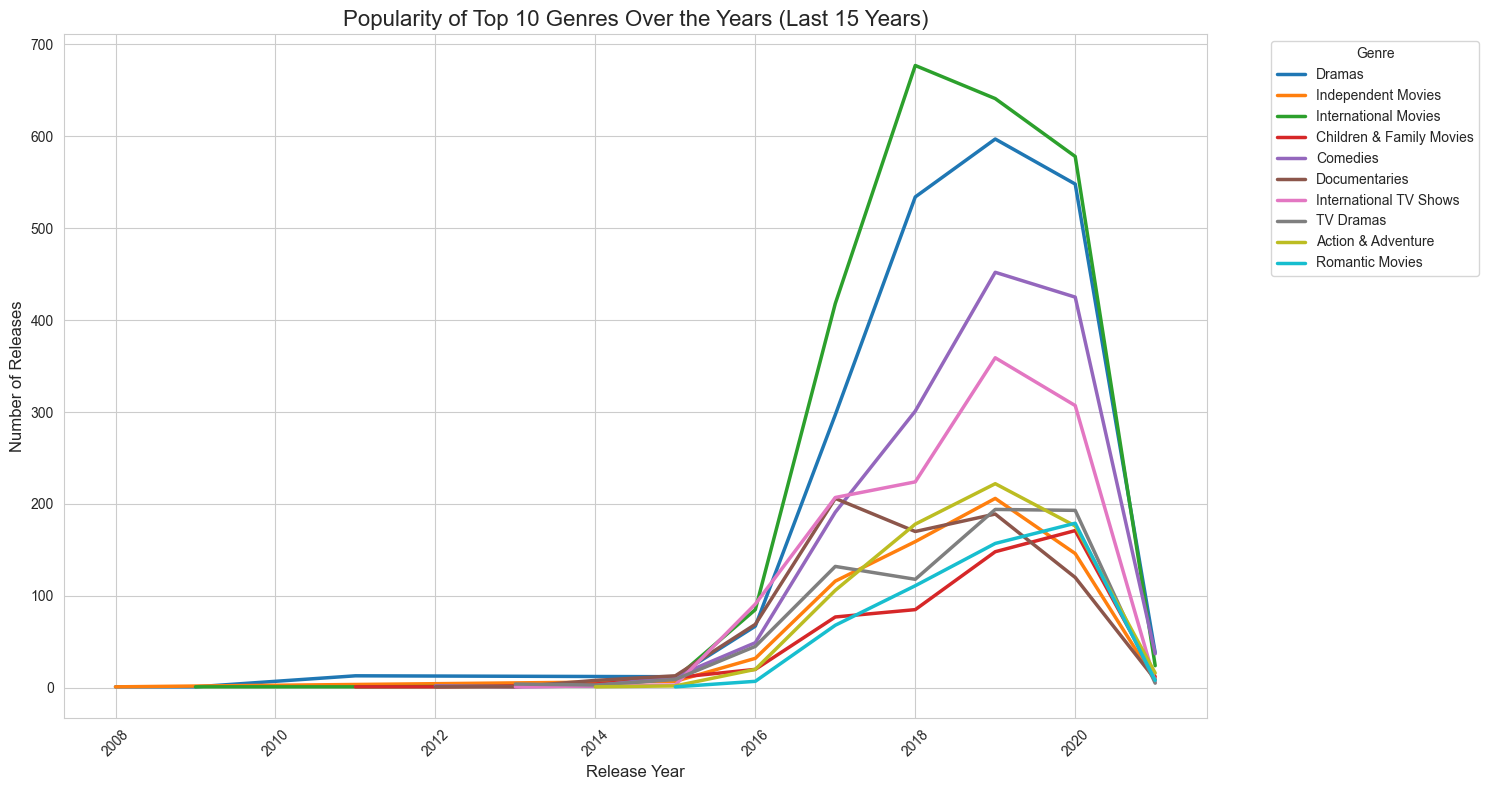

Top 5 Genres by Count in the last 5 years:
Type
International Movies      2338
Dramas                    2014
Comedies                  1406
International TV Shows    1103
Action & Adventure         698
Name: Count, dtype: int64


In [16]:
# -----------------------------------------------------------
# Objective 2: Identify the Most Common Genres and How Their Popularity Has Changed
# -----------------------------------------------------------

print("\n--- Objective 2: Genre Popularity Trend ---")

# 1. Identify Top 10 Genres overall (using the exploded genre data)
top_genres = df_genre['Type'].value_counts().nlargest(10).index
print(f"Top 10 Overall Genres:\n{top_genres.tolist()}")

# 2. Filter data for only the top genres and group by year
df_top_genre = df_genre[df_genre['Type'].isin(top_genres)]
genre_yearly = df_top_genre.groupby(['Release_Year', 'Type']).size().reset_index(name='Count')

# Filter for relevant years (same as Objective 1)
genre_yearly = genre_yearly[genre_yearly['Release_Year'] >= genre_yearly['Release_Year'].max() - 15]

# 3. Visualization (Line Plot for trend comparison)
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=genre_yearly,
    x='Release_Year',
    y='Count',
    hue='Type',
    linewidth=2.5
)
plt.title('Popularity of Top 10 Genres Over the Years (Last 15 Years)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # Display the second plot

# 4. Key Finding 2 (Growth Trend):
# Check which genres have the steepest growth in the last few years (e.g., since 2018)
recent_growth = genre_yearly[genre_yearly['Release_Year'] >= latest_year - 4].groupby('Type')['Count'].sum().sort_values(ascending=False).head(5)
print(f"Top 5 Genres by Count in the last 5 years:\n{recent_growth}")


--- Objective 3: Country Contribution Comparison ---
Top 10 Contributing Countries (excluding 'Unknown'):
Country
United States     3291
India              990
United Kingdom     721
Canada             412
France             349
Japan              286
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: count, dtype: int64


C:\Users\Abdul Malik\AppData\Local\Temp\ipykernel_26280\3438078763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


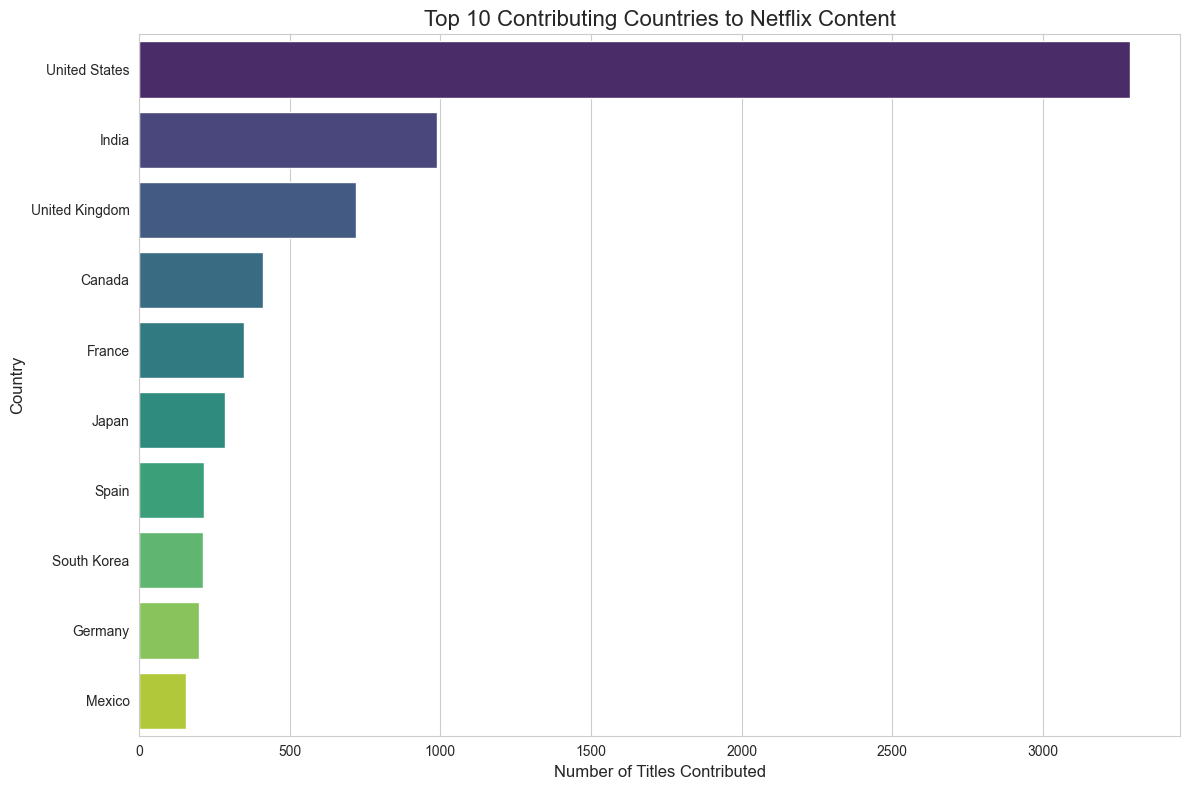

In [17]:
# -----------------------------------------------------------
# Objective 3: Compare Country-wise Contributions to Netflix’s Catalog
# -----------------------------------------------------------
print("\n--- Objective 3: Country Contribution Comparison ---")

# 1. Identify Top 10 Contributing Countries (using the exploded country data)
country_contribution = df_country['Country'].value_counts().nlargest(10)
print(f"Top 10 Contributing Countries (excluding 'Unknown'):\n{country_contribution}")

# 2. Visualization (Horizontal Bar Chart for clarity)
plt.figure(figsize=(12, 8))
sns.barplot(
    x=country_contribution.values,
    y=country_contribution.index,
    palette='viridis'
)
plt.title('Top 10 Contributing Countries to Netflix Content', fontsize=16)
plt.xlabel('Number of Titles Contributed', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show() # Display the third plot